# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### Created by: 
Paz Bunis (pazbunis@gmail.com)
#### based on:
Beata Strack, Jonathan P. DeShazo, Chris Gennings, et al., “Impact of HbA1c
Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database
Patient Records,” BioMed Research International, vol. 2014, 11 pages, 2014.

## 0. Imports and Initialization

In [318]:
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.special
from math import lgamma as lg
import scipy.stats as stats
choose = scipy.special.comb
encounters = pd.read_csv('dataset/diabetic_data.csv')
msk = np.random.rand(len(encounters)) < 0.9
encounters_train = encounters[msk]
encounters_test = encounters[~msk]

## 1. Descriptive Statistics
### 1.1. Gender vs. other attributes

#### 1.1.1. Gender vs. Age

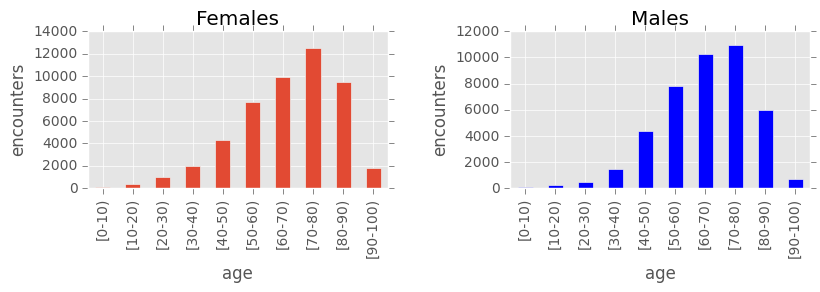

In [319]:
females_age_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('age').size()
males_age_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('age').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_age_grouping.plot.bar(ax = axs[0], title = 'Females')
males_age_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.2. Gender vs. Race

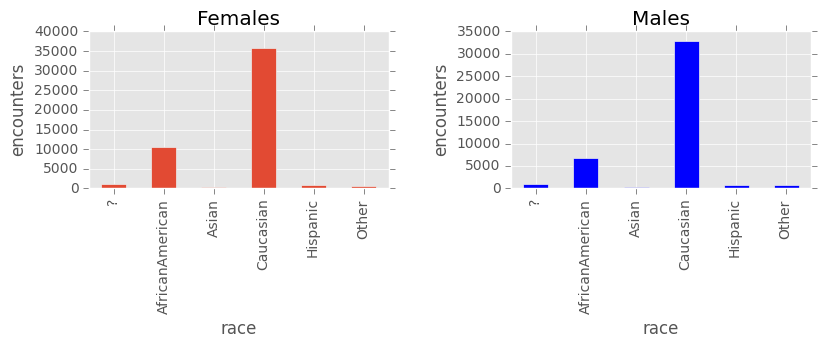

In [320]:
females_race_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('race').size()
males_race_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('race').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_race_grouping.plot.bar(ax = axs[0], title = 'Females')
males_race_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.3. Gender vs. Readmission Value

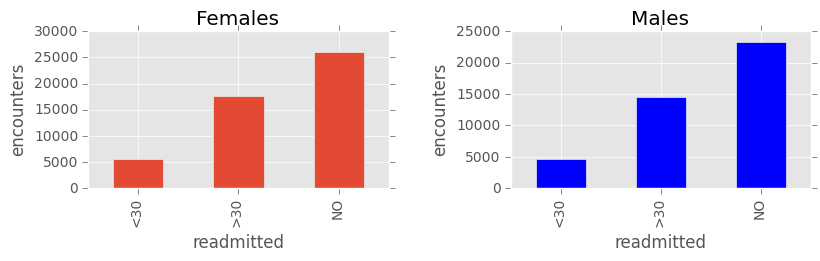

In [321]:
females_readmission_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('readmitted').size()
males_readmission_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('readmitted').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_readmission_grouping.plot.bar(ax = axs[0], title = 'Females')
males_readmission_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.4. Gender vs. Most Frequently Used ICD-9 Codes
(All three diagnosis types are combined to one column)

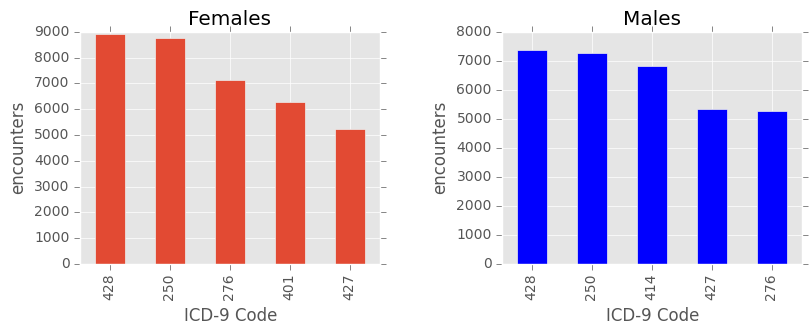

In [322]:
fem_diags_projection = encounters_train[encounters_train.gender == 'Female'][['diag_1', 'diag_2', 'diag_3']]
fem_diags_arr = [fem_diags_projection[['diag_1']],fem_diags_projection[['diag_2']],fem_diags_projection[['diag_3']]]
fem_comb_diags = pd.concat(fem_diags_arr, axis=1).stack().reset_index(drop=True)

male_diags_projection = encounters_train[encounters_train.gender == 'Male'][['diag_1', 'diag_2', 'diag_3']]
male_diags_arr = [male_diags_projection[['diag_1']],male_diags_projection[['diag_2']],male_diags_projection[['diag_3']]]
male_comb_diags = pd.concat(male_diags_arr, axis=1).stack().reset_index(drop=True)

fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("ICD-9 Code")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("ICD-9 Code")
fig.tight_layout(pad=4)
fem_comb_diags.value_counts().head().plot.bar(ax = axs[0], title = 'Females')
male_comb_diags.value_counts().head().plot.bar(ax = axs[1], title = 'Males', color='b')

### 1.2. Days in Hospital and A1c Test Results

#### 1.2.1. Days in Hospital vs. Gender

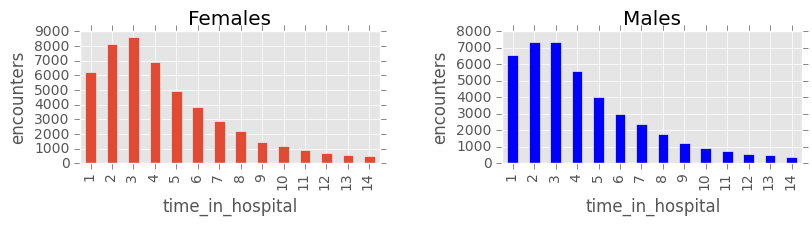

In [323]:
females_hospital_time_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('time_in_hospital').size()
males_hospital_time_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('time_in_hospital').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_hospital_time_grouping.plot.bar(ax = axs[0], title = 'Females')
males_hospital_time_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.2. Days in Hospital vs. Age Group

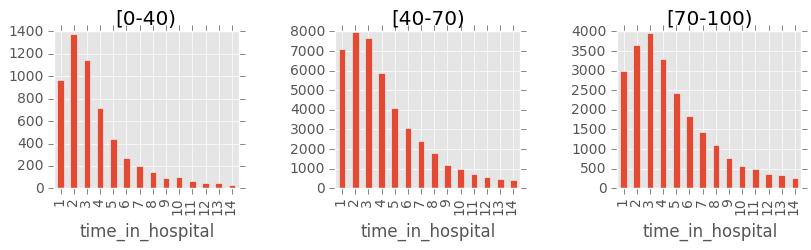

In [324]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('time_in_hospital').size()
group2_hospital_time = age_group2.groupby('time_in_hospital').size()
group3_hospital_time = age_group3.groupby('time_in_hospital').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

#### 1.2.3. A1c test results vs. Gender

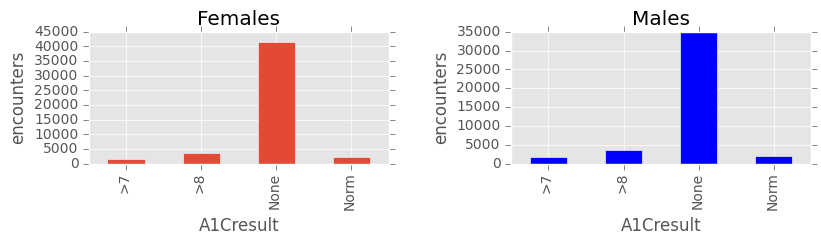

In [325]:
females_A1C_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('A1Cresult').size()
males_A1C_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('A1Cresult').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_A1C_grouping.plot.bar(ax = axs[0], title = 'Females')
males_A1C_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.4. A1c test results vs. Age Group

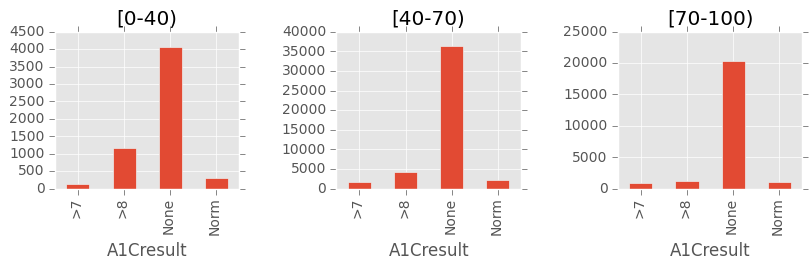

In [326]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('A1Cresult').size()
group2_hospital_time = age_group2.groupby('A1Cresult').size()
group3_hospital_time = age_group3.groupby('A1Cresult').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

### 1.3. Other Results

In [327]:
# TODO: add more Descriptive Statistics

## 2. Hypothesis Testing

### 2.1. Is Testing HbA1c  Associated With a Reduced Rate of Readmission?
Our null hypothesis $H_0$ is that there is no correlation between the HbA1c test and the rate of readmission.
In order to test this, we will use the Fisher exact test and the Chi-square test (which is supposed to be better for larger numbers).

In [333]:
proj = encounters_train[['A1Cresult', 'readmitted']]
ct = pd.crosstab(proj.A1Cresult, proj.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
print(ct)

readmitted  readmitted  not_readmitted    All
A1Cresult                                    
>7                 333            3087   3420
>8                 732            6623   7355
None              8760           67515  76275
Norm               433            4058   4491
All              10258           81283  91541


####  Fisher Exact Test 

In [332]:
contingency_table = [[N_readmitted_tested, N_readmitted_not_tested],[N_not_readmitted_tested, N_not_readmitted_not_tested]]
odds_ratio, p_val = scipy.stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

Odds ratio: 0.839557047358
P-value: 1.67165271753e-09


As we see here, we get $p < 0.001$ and an odds-ratio which is significantly lower than 1, so we should reject the null hypothesis.


####  Chi-Square Test

In [331]:
statistic, p_val, _, _ =scipy.stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

Statistic value: 35.1767592032
P-value: 3.01095491492e-09


We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

### 2.2. Is Drug Prescription or Dosage Change Associated With a Reduced Rate of Readmission? 


Our null hypothesis  $H_0$  is that there is no correlation between drug prescription or dosage change and the rate of readmission. 
As before, we use the Fisher exact test and the Chi-square test for added robustness. 